<a href="https://colab.research.google.com/github/vedanth-aggarwal/warehouse_optimization_QLearning/blob/main/warehouse_optimization_Qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q-Learning Implementation for Process Optimization

## Case Study : Optimizing flows in an e-commerce warehouse

* The warehouse belongs to an online retail company that sells products to a variety of customers. Inside this
warehouse, the products are stored in 12 different locations, labeled by the following letters from A to L:
* An Autonomous Warehouse Robot is moving around the
warehouse to collect the products for future deliveries. Here is what it looks like:
* The 12 locations are all connected to a computer system, which is ranking in real time the priorities of
product collection for these 12 locations. For example, at a specific time t, it will return the following
ranking:
Priority Rank \ Location
1 G
2 K
3 L
* Our goal is to build an AI that will return that shortest route, wherever the
robot is. But then as we see, locations K and L are in the Top 3 priorities. Hence we will want to implement
an option for our Autonomous Warehouse Robot to go by some intermediary locations ( top 3 priorities ) before reaching its
final top priority location.



# Environmnt to deifne


* Defining the states - Current location of autonomous robot ( index numbers corresponding to letters )
* Define actions - 0 to 11 indicating all the letters We will make sure to specify that by attributing a 0 reward to the actions it cannot play,
and a 1 reward to the actions it can play. And that brings us to the rewards.
* R : (state, action) 7→ r ∈ R. our reward function R is to simply make a matrix. Our
reward function will exactly be a matrix of 12 rows and 12 columns, where the rows correspond to the states,
and the columns correspond to the actions. 0 for not movable and 1 reward for movable spaces

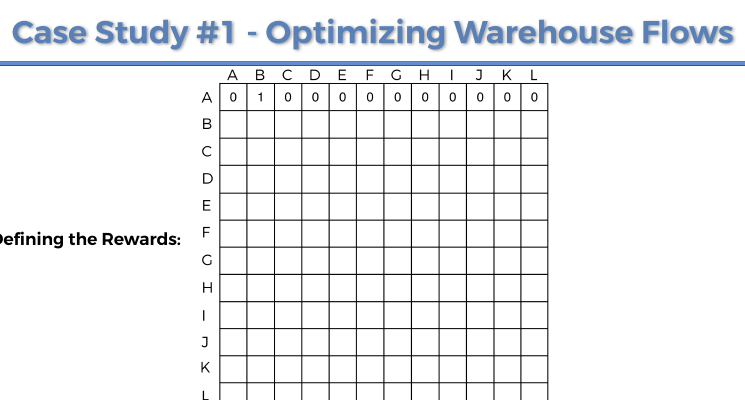

We are almost done, the only thing we need to do left is to attribute high rewards to the top priority
locations. This will be done by the computer system that returns the priorities of product collection for
each of the 12 locations. Therefore, since location G is the top priority, the computer system will update
the matrix of rewards by attributing a high reward in the cell (G,G): 1000 reward

#### MARKOV DECISION PROCESS  tuple (S, A, T,R) - no memory


In [ ]:
# Importing the libraries
import numpy as np

In [ ]:
# Setting the parameters gamma and alpha for the Q-Learning
gamma = 0.75 # discount factor
alpha = 0.9 # learning rate

In [ ]:
# PART 1 - DEFINING THE ENVIRONMENT
# Defining the states
location_to_state = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,
                     'G':6,'H':7,'I':8,'J':9,'K':10,'L':11}


# Defining the actions
actions = [0,1,2,3,4,5,6,7,8,9,10,11]


# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
[1,0,1,0,0,1,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0],
[0,1,0,0,0,0,0,0,0,1,0,0],
[0,0,1,0,0,0,1000,1,0,0,0,0],
[0,0,0,1,0,0,1,0,0,0,0,1],
[0,0,0,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,1,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,1,0,0,1,0]])

In [ ]:
# PART 2 - BUILDING THE AI SOLUTION WITH Q-LEARNING
# Initializing the Q-Values
Q = np.array(np.zeros([12,12]))

# Implementing the Q-Learning process
for i in range(1000):
  current_state = np.random.randint(0,12)
  playable_actions = []
  for j in range(12):
    if R[current_state, j] > 0:
      playable_actions.append(j)
  next_state = np.random.choice(playable_actions)
  # Temporal difference
  TD = R[current_state, next_state] + gamma*Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
  Q[current_state, next_state] = Q[current_state, next_state] + alpha*TD

In [ ]:
print("Q-Values:")
print(      .astype(int))

Q-Values:
[[   0 1683    0    0    0    0    0    0    0    0    0    0]
 [1262    0 2244    0    0 1261    0    0    0    0    0    0]
 [   0 1683    0    0    0    0 2992    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2245    0    0    0    0]
 [   0    0    0    0    0    0    0    0  711    0    0    0]
 [   0 1683    0    0    0    0    0    0    0  948    0    0]
 [   0    0 2243    0    0    0 3993 2244    0    0    0    0]
 [   0    0    0 1681    0    0 2995    0    0    0    0 1681]
 [   0    0    0    0  534    0    0    0    0  947    0    0]
 [   0    0    0    0    0 1263    0    0  711    0 1261    0]
 [   0    0    0    0    0    0    0    0    0  948    0 1684]
 [   0    0    0    0    0    0    0 2245    0    0 1261    0]]


In [ ]:
# PART 3 - GOING INTO PRODUCTION
# Making a mapping from the states to the locations
state_to_location = {state: location for location, state in location_to_state.items()}
state_to_location

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L'}

In [ ]:
# Making the final function that will return the optimal route
def oldroute(starting_location, ending_location):
  route = [starting_location]
  next_location = starting_location
  while (next_location != ending_location):
    starting_state = location_to_state[starting_location]
    next_state = np.argmax(Q[starting_state,])
    next_location = state_to_location[next_state]
    route.append(next_location)
    starting_location = next_location
  return route
  # Printing the final route
print('Route : ')
oldroute('E', 'G')

Route : 


['E', 'I', 'J', 'F', 'B', 'C', 'G']

In [ ]:
# Making a function that returns the shortest route from a starting to ending location
50 def route(starting_location, ending_location):
R_new = np.copy(R)
ending_state = location_to_state[ending_location]
R_new[ending_state, ending_state] = 1000
Q = np.array(np.zeros([12,12]))
55 for i in range(1000):
current_state = np.random.randint(0,12)
playable_actions = []
for j in range(12):
i f R_new[current_state, j] > 0:
60 playable_actions.append(j)
next_state = np.random.choice(playable_actions)
TD = R_new[current_state, next_state]
+ gamma * Q[next_state, np.argmax(Q[next_state,])]
- Q[current_state, next_state]
65 Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
route = [starting_location]
next_location = starting_location
while (next_location != ending_location):
starting_state = location_to_state[starting_location]
70 next_state = np.argmax(Q[starting_state,])
next_location = state_to_location[next_state]
route.append(next_location)
starting_location = next_location
return route
75
# PART 3 - GOING INTO PRODUCTION
# Making the final function that returns the optimal route
def best_route(starting_location, intermediary_location, ending_location):
80 return route(starting_location, intermediary_location)
+ route(intermediary_location, ending_location)[1:]
# Printing the final route
print(’Route:’)
85 best_route(’E’, ’K’, ’G’)